In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#Data Upload

In [3]:
customers = pd.read_csv("/content/drive/MyDrive/Data Science/Customers.csv")
products = pd.read_csv("/content/drive/MyDrive/Data Science/Products.csv")
transactions = pd.read_csv("/content/drive/MyDrive/Data Science/Transactions.csv")

#Exploartory Data Analysis

In [4]:
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [5]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [6]:
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

#Region-wise revenue distribution

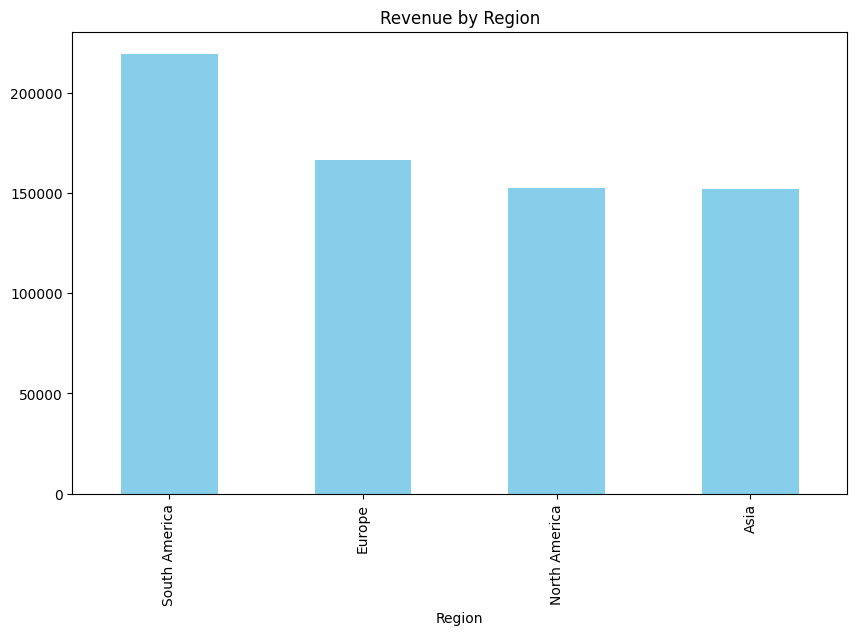

In [7]:
region_revenue = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
region_revenue.plot(kind='bar', color='skyblue')
plt.title("Revenue by Region")
plt.show()

#Top Product categories

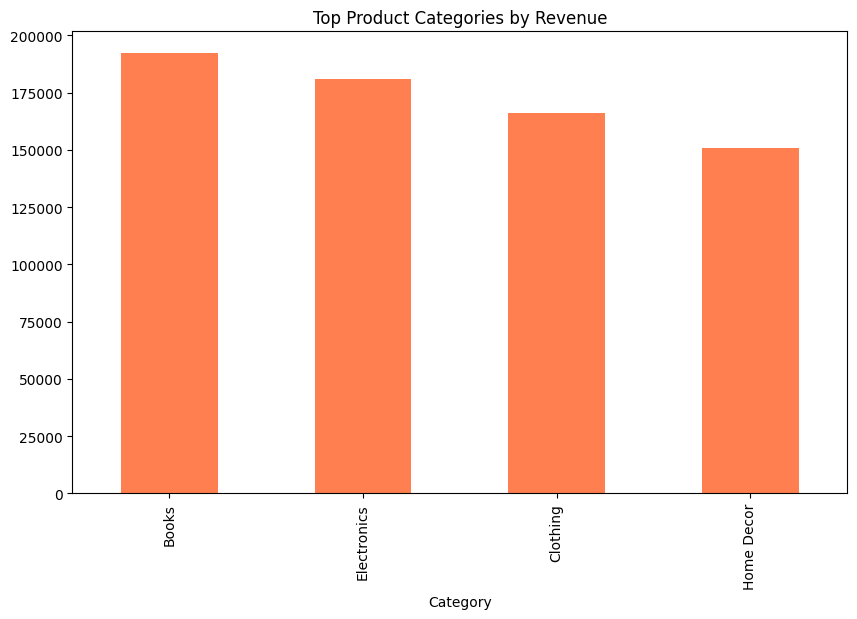

In [8]:
top_categories = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color='coral')
plt.title("Top Product Categories by Revenue")
plt.show()

#Monthly sales trends

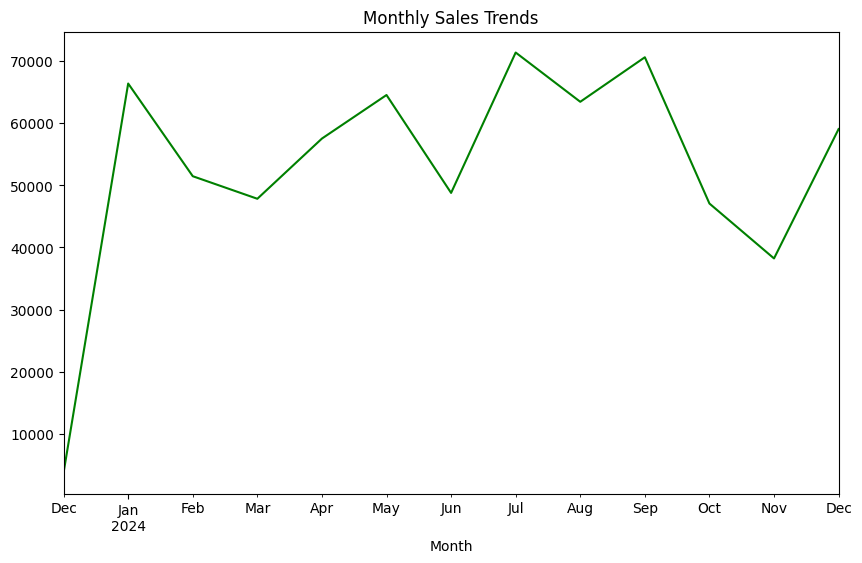

In [9]:
merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_sales = merged_data.groupby('Month')['TotalValue'].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot(color='green')
plt.title("Monthly Sales Trends")
plt.show()

#Signup trends by year

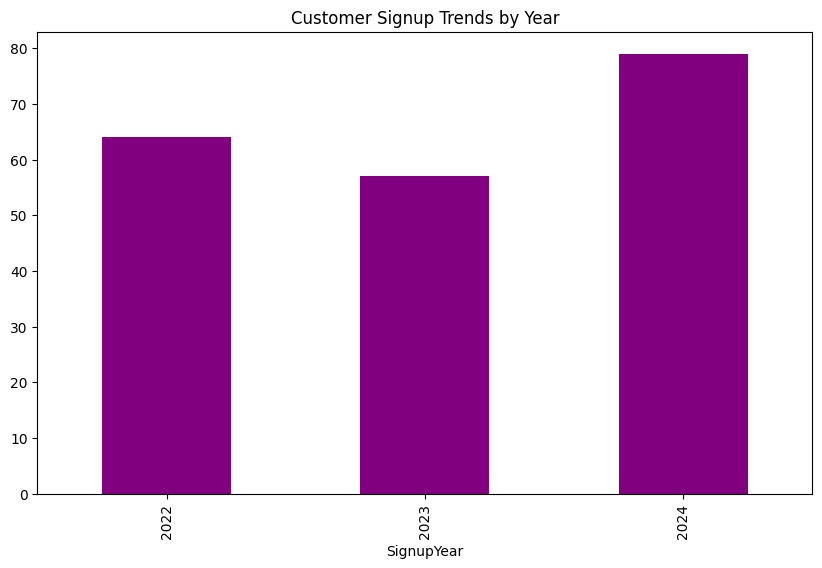

In [10]:
customers['SignupYear'] = customers['SignupDate'].dt.year
signup_trends = customers.groupby('SignupYear')['CustomerID'].count()
plt.figure(figsize=(10, 6))
signup_trends.plot(kind='bar', color='purple')
plt.title("Customer Signup Trends by Year")
plt.show()

#Average transaction value by region

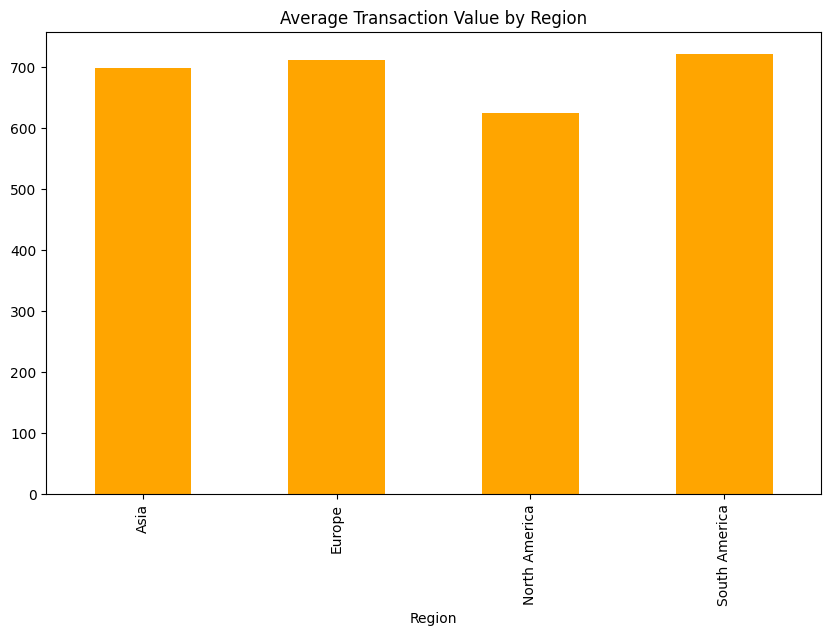

In [11]:
avg_transaction_value = merged_data.groupby('Region')['TotalValue'].mean()
plt.figure(figsize=(10, 6))
avg_transaction_value.plot(kind='bar', color='orange')
plt.title("Average Transaction Value by Region")
plt.show()

#Repeated customer analysis

In [12]:
repeat_customers = merged_data.groupby('CustomerID').size()
repeat_customer_count = repeat_customers[repeat_customers > 1].count()
total_customers = customers['CustomerID'].nunique()
repeat_customer_percentage = (repeat_customer_count / total_customers) * 100
print(f"Percentage of Repeat Customers: {repeat_customer_percentage:.2f}%")

Percentage of Repeat Customers: 93.50%
